In [1]:
import warnings
 
warnings.filterwarnings("ignore")
import matplotlib as mpl
import seaborn as sns
import scipy as sp
import scipy.stats
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


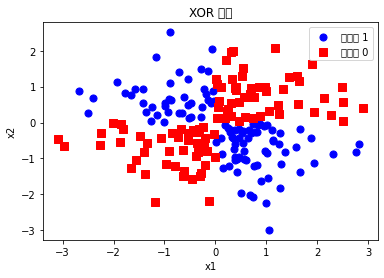

In [2]:
X_xor = np.random.randn(200, 2)
y_xor = np.logical_xor(X_xor[:, 0] > 0, X_xor[:, 1] > 0)
y_xor = np.where(y_xor, 1, 0)
plt.scatter(X_xor[y_xor == 1, 0], X_xor[y_xor == 1, 1],
            c='b', marker='o', label='클래스 1', s=50)
plt.scatter(X_xor[y_xor == 0, 0], X_xor[y_xor == 0, 1],
            c='r', marker='s', label='클래스 0', s=50)
plt.legend()
plt.xlabel("x1")
plt.ylabel("x2")
plt.title("XOR 문제")
plt.show()

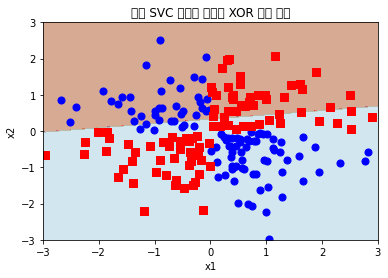

In [4]:
def plot_xor(X, y, model, title, xmin=-3, xmax=3, ymin=-3, ymax=3):
    XX, YY = np.meshgrid(np.arange(xmin, xmax, (xmax-xmin)/1000),
                         np.arange(ymin, ymax, (ymax-ymin)/1000))
    ZZ = np.reshape(model.predict(
        np.array([XX.ravel(), YY.ravel()]).T), XX.shape)
    plt.contourf(XX, YY, ZZ, cmap=mpl.cm.Paired_r, alpha=0.5)
    plt.scatter(X[y == 1, 0], X[y == 1, 1], c='b',
                marker='o', label='클래스 1', s=50)
    plt.scatter(X[y == 0, 0], X[y == 0, 1], c='r',
                marker='s', label='클래스 0', s=50)
    plt.xlim(xmin, xmax)
    plt.ylim(ymin, ymax)
    plt.title(title)
    plt.xlabel("x1")
    plt.ylabel("x2")


from sklearn.svm import SVC

svc = SVC(kernel="linear").fit(X_xor, y_xor)
plot_xor(X_xor, y_xor, svc, "선형 SVC 모형을 사용한 XOR 분류 결과")
plt.show()

In [8]:
X = np.arange(6).reshape(3,2)
X

array([[0, 1],
       [2, 3],
       [4, 5]])

In [10]:
from sklearn.preprocessing import FunctionTransformer

def basis(X):
    return np.vstack([X[:,0]**2, np.sqrt(2)*X[:,1],X[:,1]**2]).T

FunctionTransformer(basis).fit_transform(X)

array([[ 0.        ,  1.41421356,  1.        ],
       [ 4.        ,  4.24264069,  9.        ],
       [16.        ,  7.07106781, 25.        ]])

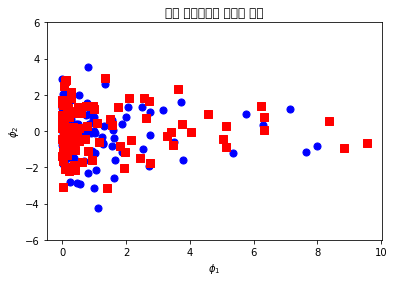

In [11]:
X_xor2 = FunctionTransformer(basis).fit_transform(X_xor)
plt.scatter(X_xor2[y_xor == 1, 0], X_xor2[y_xor == 1, 1], c="b", marker='o', s=50)
plt.scatter(X_xor2[y_xor == 0, 0], X_xor2[y_xor == 0, 1], c="r", marker='s', s=50)
plt.ylim(-6, 6)
plt.title("변환 공간에서의 데이터 분포")
plt.xlabel(r"$\phi_1$")
plt.ylabel(r"$\phi_2$")
plt.show()

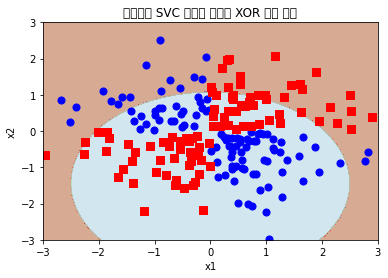

In [12]:
from sklearn.pipeline import Pipeline

basismodel = Pipeline([("basis", FunctionTransformer(basis)), 
                       ("svc", SVC(kernel="linear"))]).fit(X_xor, y_xor)
plot_xor(X_xor, y_xor, basismodel, "변환함수 SVC 모형을 사용한 XOR 분류 결과")
plt.show()

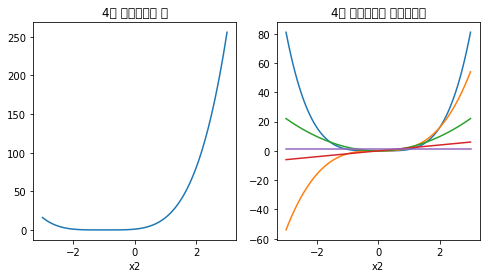

In [13]:
x1 = 1
x2 = np.linspace(-3, 3, 100)

def poly4(x1, x2):
    return (x1 * x2 + 1) ** 4

plt.figure(figsize=(8, 4))
plt.subplot(121)
plt.plot(x2, poly4(x1, x2), ls="-")
plt.xlabel("x2")
plt.title("4차 다항커널의 예")

plt.subplot(122)
plt.plot(x2, x2 ** 4)
plt.plot(x2, 2 * x2 ** 3)
plt.plot(x2, np.sqrt(6) * x2 ** 2)
plt.plot(x2, 2 * x2)
plt.plot(x2, np.ones_like(x2))
plt.xlabel("x2")
plt.title("4차 다항커널의 변환함수들")

plt.show()

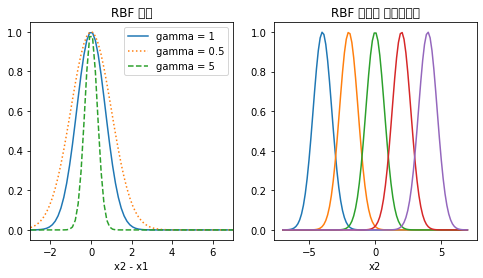

In [14]:
x1 = 0.0
x2 = np.linspace(-7, 7, 100)

def rbf(x1, x2, gamma):
    return np.exp(-gamma * np.abs(x2 - x1) ** 2)

plt.figure(figsize=(8, 4))
plt.subplot(121)
plt.plot(x2, rbf(x1, x2, 1), ls="-", label="gamma = 1")
plt.plot(x2, rbf(x1, x2, 0.5), ls=":", label="gamma = 0.5")
plt.plot(x2, rbf(x1, x2, 5), ls="--", label="gamma = 5")
plt.xlabel("x2 - x1")
plt.xlim(-3, 7)
plt.legend(loc=1)
plt.title("RBF 커널")

plt.subplot(122)
plt.plot(x2, rbf(-4, x2, 1))
plt.plot(x2, rbf(-2, x2, 1))
plt.plot(x2, rbf(0, x2, 1))
plt.plot(x2, rbf(2, x2, 1))
plt.plot(x2, rbf(4, x2, 1))
plt.xlabel("x2")
plt.title("RBF 커널의 변환함수들")

plt.show()

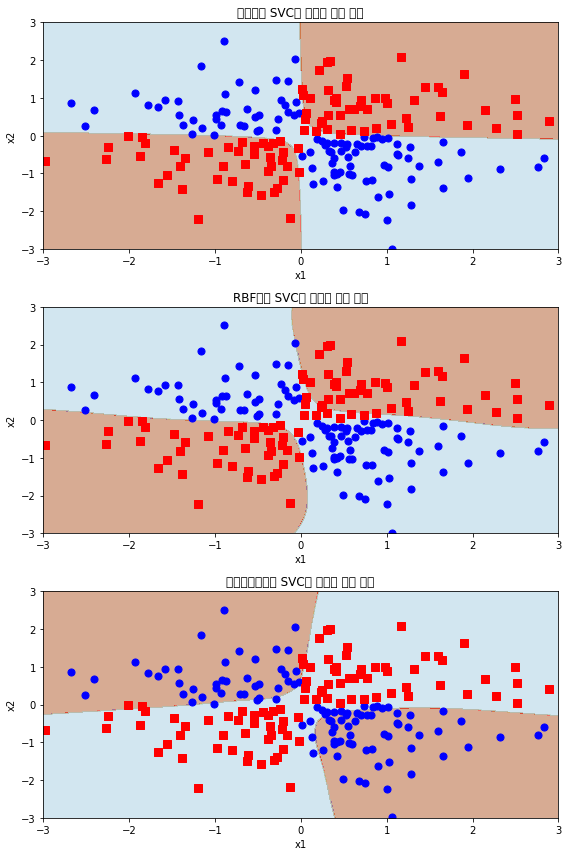

In [15]:
polysvc = SVC(kernel="poly", degree=2, gamma=1, coef0=0).fit(X_xor, y_xor)
rbfsvc = SVC(kernel="rbf").fit(X_xor, y_xor)
sigmoidsvc = SVC(kernel="sigmoid", gamma=2, coef0=2).fit(X_xor, y_xor)

plt.figure(figsize=(8, 12))
plt.subplot(311)
plot_xor(X_xor, y_xor, polysvc, "다항커널 SVC를 사용한 분류 결과")
plt.subplot(312)
plot_xor(X_xor, y_xor, rbfsvc, "RBF커널 SVC를 사용한 분류 결과")
plt.subplot(313)
plot_xor(X_xor, y_xor, sigmoidsvc, "시그모이드커널 SVC를 사용한 분류 결과")
plt.tight_layout()
plt.show()

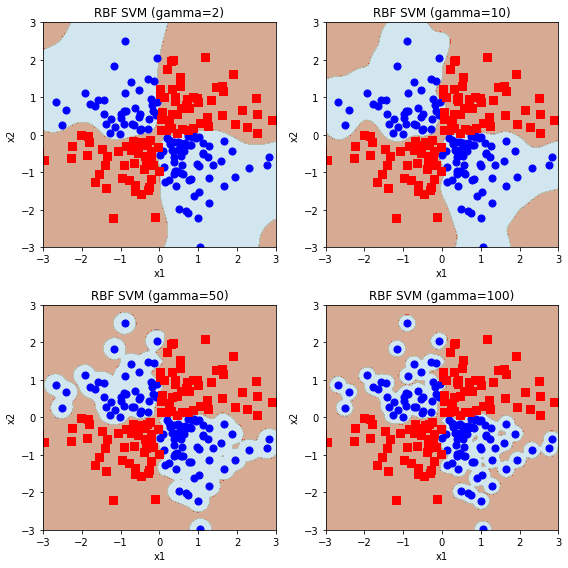

In [16]:
plt.figure(figsize=(8, 8))
plt.subplot(221)
plot_xor(X_xor, y_xor, SVC(kernel="rbf", gamma=2).fit(X_xor, y_xor), "RBF SVM (gamma=2)")
plt.subplot(222)
plot_xor(X_xor, y_xor, SVC(kernel="rbf", gamma=10).fit(X_xor, y_xor), "RBF SVM (gamma=10)")
plt.subplot(223)
plot_xor(X_xor, y_xor, SVC(kernel="rbf", gamma=50).fit(X_xor, y_xor), "RBF SVM (gamma=50)")
plt.subplot(224)
plot_xor(X_xor, y_xor, SVC(kernel="rbf", gamma=100).fit(X_xor, y_xor), "RBF SVM (gamma=100)")
plt.tight_layout()
plt.show()

In [17]:
from sklearn.datasets import load_digits
from sklearn.svm import SVC
from sklearn.model_selection import validation_curve

digits = load_digits()
X, y = digits.data, digits.target

param_range = np.logspace(-6, -1, 10)

In [18]:
%%time
train_scores, test_scores = \
    validation_curve(SVC(), X, y,
                     param_name="gamma", param_range=param_range,
                     cv=10, scoring="accuracy", n_jobs=1)

Wall time: 57.3 s


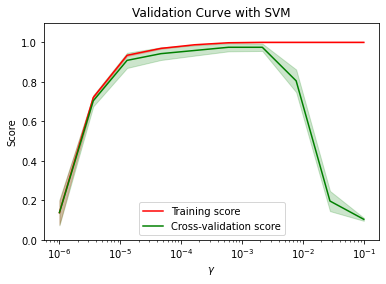

In [19]:
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

mpl.rcParams["font.family"] = 'DejaVu Sans'
plt.semilogx(param_range, train_scores_mean, label="Training score", color="r")
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2, color="r")
plt.semilogx(param_range, test_scores_mean,
             label="Cross-validation score", color="g")
plt.fill_between(param_range, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2, color="g")
plt.legend(loc="best")
plt.title("Validation Curve with SVM")
plt.xlabel("$\gamma$")
plt.ylabel("Score")
plt.ylim(0.0, 1.1)
plt.show()

In [20]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

pipe_svc = Pipeline([('scl', StandardScaler()), ('clf', SVC(random_state=1))])

param_range = [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]
param_grid = [
    {'clf__C': param_range, 'clf__kernel': ['linear']},
    {'clf__C': param_range, 'clf__gamma': param_range, 'clf__kernel': ['rbf']}]

gs = GridSearchCV(estimator=pipe_svc, param_grid=param_grid,
                  scoring='accuracy', cv=10, n_jobs=1)
%time gs = gs.fit(X, y)

Wall time: 6min 2s


In [21]:
gs.cv_results_["params"]

[{'clf__C': 0.0001, 'clf__kernel': 'linear'},
 {'clf__C': 0.001, 'clf__kernel': 'linear'},
 {'clf__C': 0.01, 'clf__kernel': 'linear'},
 {'clf__C': 0.1, 'clf__kernel': 'linear'},
 {'clf__C': 1.0, 'clf__kernel': 'linear'},
 {'clf__C': 10.0, 'clf__kernel': 'linear'},
 {'clf__C': 100.0, 'clf__kernel': 'linear'},
 {'clf__C': 1000.0, 'clf__kernel': 'linear'},
 {'clf__C': 0.0001, 'clf__gamma': 0.0001, 'clf__kernel': 'rbf'},
 {'clf__C': 0.0001, 'clf__gamma': 0.001, 'clf__kernel': 'rbf'},
 {'clf__C': 0.0001, 'clf__gamma': 0.01, 'clf__kernel': 'rbf'},
 {'clf__C': 0.0001, 'clf__gamma': 0.1, 'clf__kernel': 'rbf'},
 {'clf__C': 0.0001, 'clf__gamma': 1.0, 'clf__kernel': 'rbf'},
 {'clf__C': 0.0001, 'clf__gamma': 10.0, 'clf__kernel': 'rbf'},
 {'clf__C': 0.0001, 'clf__gamma': 100.0, 'clf__kernel': 'rbf'},
 {'clf__C': 0.0001, 'clf__gamma': 1000.0, 'clf__kernel': 'rbf'},
 {'clf__C': 0.001, 'clf__gamma': 0.0001, 'clf__kernel': 'rbf'},
 {'clf__C': 0.001, 'clf__gamma': 0.001, 'clf__kernel': 'rbf'},
 {'clf__C

In [22]:
gs.cv_results_["mean_test_score"]

array([0.23120112, 0.91485413, 0.95046245, 0.95547176, 0.95658908,
       0.95658908, 0.95658908, 0.95658908, 0.13089385, 0.13536313,
       0.13927374, 0.12418994, 0.1001676 , 0.13089385, 0.10687151,
       0.1001676 , 0.13089385, 0.13536313, 0.13927374, 0.12418994,
       0.1001676 , 0.13089385, 0.10687151, 0.1001676 , 0.13089385,
       0.13536313, 0.14429857, 0.12418994, 0.1001676 , 0.13089385,
       0.10687151, 0.1001676 , 0.13089385, 0.68335816, 0.90761639,
       0.40958101, 0.1001676 , 0.13089385, 0.10687151, 0.1001676 ,
       0.70449721, 0.93153011, 0.96047796, 0.90317505, 0.12469894,
       0.1001676 , 0.10128492, 0.1001676 , 0.93264742, 0.95547176,
       0.96937927, 0.90540348, 0.13416511, 0.1001676 , 0.10128492,
       0.1001676 , 0.95547796, 0.96047796, 0.96937927, 0.90540348,
       0.13416511, 0.1001676 , 0.10128492, 0.1001676 , 0.95825885,
       0.95935754, 0.96937927, 0.90540348, 0.13416511, 0.1001676 ,
       0.10128492, 0.1001676 ])

In [23]:
print(gs.best_score_)
print(gs.best_params_)

0.969379267535692
{'clf__C': 10.0, 'clf__gamma': 0.01, 'clf__kernel': 'rbf'}


In [24]:
%%time
from sklearn.datasets import fetch_rcv1
rcv_train = fetch_rcv1(subset="train")
rcv_test = fetch_rcv1(subset="test")
X_train = rcv_train.data
y_train = rcv_train.target
X_test = rcv_test.data
y_test = rcv_test.target

# Ont-Hot-Encoding된 라벨을 정수형으로 복원
classes = np.arange(rcv_train.target.shape[1])
y_train = y_train.dot(classes)
y_test = y_test.dot(classes)

print(X_train.shape)

(23149, 47236)
Wall time: 13.8 s


In [25]:
from sklearn.feature_selection import VarianceThreshold

selector = VarianceThreshold(1e-5)
X_train_sel = selector.fit_transform(X_train)
X_test_sel = selector.transform(X_test)
X_train_sel.shape

(23149, 14330)

In [26]:
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import accuracy_score

In [27]:
%%time
model = BernoulliNB()
model.fit(X_train, y_train)
print("train accuracy:{:5.3f}".format(accuracy_score(y_train, model.predict(X_train))))
print("test accuracy :{:5.3f}".format(accuracy_score(y_test, model.predict(X_test))))

train accuracy:0.381
test accuracy :0.324
Wall time: 43.5 s


In [29]:
%%time
model = BernoulliNB()
model.fit(X_train_sel, y_train)
print("train accuracy:{:5.3f}".format(accuracy_score(y_train, model.predict(X_train_sel))))
print("test accuracy :{:5.3f}".format(accuracy_score(y_test, model.predict(X_test_sel)))

SyntaxError: unexpected EOF while parsing (<unknown>, line 4)